
# Box Office Revenue Prediction
Predicting box office revenue is a critical task for the film industry, helping studios make informed decisions about marketing budgets, release strategies, and expected profitability. The task involves analyzing diverse datasets, including cast, crew, budget, and release details, to predict potential revenue.

In this notebook, we explore multiple machine learning algorithms to predict box office revenue. Models such as Random Forest, CNN, and others are implemented and compared for their performance on the chosen dataset.


# Movie Rating Prediction using MovieLens Dataset

This notebook implements a movie rating prediction system using the MovieLens dataset. We'll build several models to predict user ratings for movies based on various features.

## Data Source
MovieLens dataset from: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


## 2. Load and Explore Data

In [15]:
# File paths (update these if needed)
movies = 'tmdb_5000_movies.csv'
credits = 'tmdb_5000_credits.csv'

# Load the datasets into pandas DataFrames
movies_df = pd.read_csv(movies)
credits_df = pd.read_csv(credits)

In [16]:
# Display information about the movies dataset
movies_df.info()
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [17]:
# Display information about the credits dataset
credits_df.info()
credits_df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


<bound method NDFrame.head of       movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 4 columns]>

In [18]:
# Summary statistics for numerical columns in movies dataset
print(movies_df.describe())

             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max      

## 3. Data Analysis and Visualization

In [19]:
# Check for missing values in movies dataset
print("\nMissing Values in Movies Dataset:")
print(movies_df.isnull().sum())


Missing Values in Movies Dataset:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


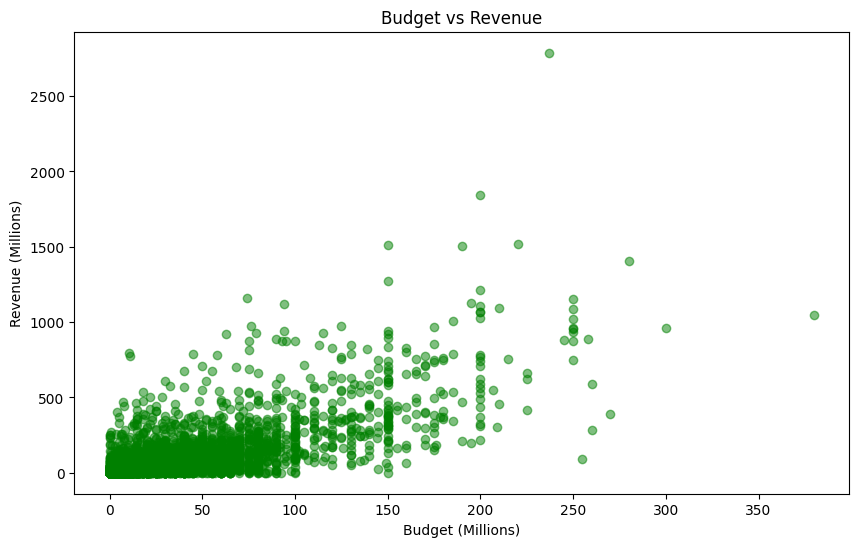

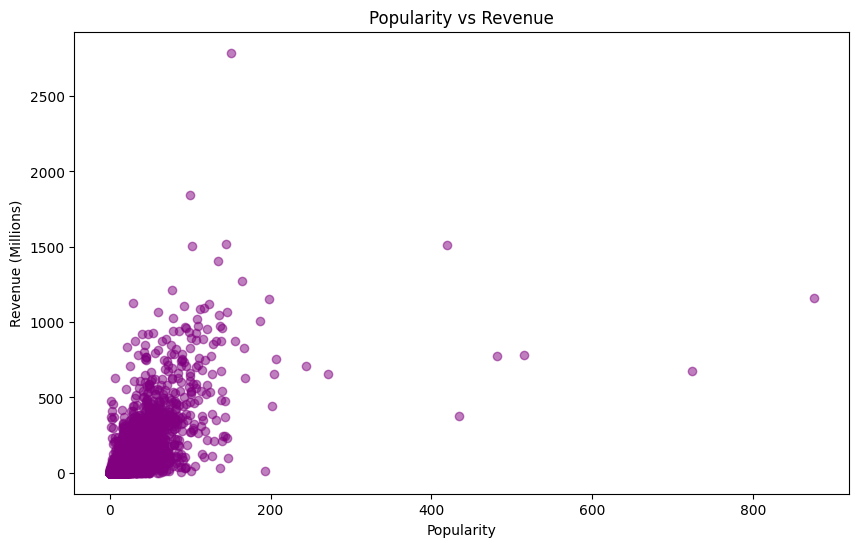

In [20]:
# Budget vs Revenue Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['budget'] / 1e6, movies_df['revenue'] / 1e6, alpha=0.5, color='green')
plt.title("Budget vs Revenue")
plt.xlabel("Budget (Millions)")
plt.ylabel("Revenue (Millions)")
plt.show()

# Popularity vs Revenue Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['popularity'], movies_df['revenue'] / 1e6, alpha=0.5, color='purple')
plt.title("Popularity vs Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue (Millions)")
plt.show()




## 4. Data Preprocessing

In [21]:
movies_df['runtime'] = movies_df['runtime'].fillna(movies_df['runtime'].median())

# Drop rows with missing release_date (minor)
movies_df = movies_df.dropna(subset=['release_date'])

# Drop non-essential columns with excessive missing data
movies_df = movies_df.drop(columns=['homepage', 'tagline'])

# Create one-hot encoded genres
movies_df = movies_df.explode('genres_list')  # have one genre per row
genre_dummies = pd.get_dummies(movies_df['genres_list'], prefix='genre')
movies_df = pd.concat([movies_df, genre_dummies], axis=1)

# Drop these columns to avoid data duplication
movies_df = movies_df.drop(columns=['genres_list'])

# Step 3: Transform Release Date
movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
movies_df['release_month'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.month

# Drop original release_date column
movies_df = movies_df.drop(columns=['release_date'])

# Step 4: Log Transformation for Budget and Revenue (to handle skewness)
movies_df['log_budget'] = np.log1p(movies_df['budget'])  # log1p handles log(0) by adding 1
movies_df['log_revenue'] = np.log1p(movies_df['revenue'])

# Drop original budget and revenue columns
movies_df = movies_df.drop(columns=['budget', 'revenue'])

# Step 5: Feature and Target Selection
# Select features
features = ['log_budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_month'] + \
           [col for col in movies_df.columns if col.startswith('genre_')]

# Target variable
target = 'log_revenue'

X = movies_df[features]
y = movies_df[target]

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Models

# Random Forrest

In [22]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Performance:")
print(f"MAE: {rf_mae}, MSE: {rf_mse}, R^2: {rf_r2}")



Random Forest Performance:
MAE: 1.302048014964596, MSE: 6.699810215889896, R^2: 0.8911535918655187


## Support Vector Machine (SVM)

In [23]:
# Train the SVM model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate SVM
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

print("\nSVM Performance:")
print(f"MAE: {svm_mae}, MSE: {svm_mse}, R^2: {svm_r2}")



SVM Performance:
MAE: 2.546481098498548, MSE: 27.11500561445772, R^2: 0.5594843924563311


# CNN


In [24]:
# Reshape data for CNN (add channel dimension)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
cnn_predictions = cnn_model.predict(X_test_cnn).flatten()

# Evaluate CNN
cnn_mae = mean_absolute_error(y_test, cnn_predictions)
cnn_mse = mean_squared_error(y_test, cnn_predictions)
cnn_r2 = r2_score(y_test, cnn_predictions)

print("\nCNN Performance:")
print(f"MAE: {cnn_mae}, MSE: {cnn_mse}, R^2: {cnn_r2}")


Epoch 1/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 81.6689 - mae: 7.4009 - val_loss: 27.2251 - val_mae: 3.5235
Epoch 2/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.7787 - mae: 3.4313 - val_loss: 25.6578 - val_mae: 3.4425
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25.8132 - mae: 3.4112 - val_loss: 25.5222 - val_mae: 3.4438
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.3891 - mae: 3.4388 - val_loss: 24.8427 - val_mae: 3.1785
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.1446 - mae: 3.4074 - val_loss: 24.9599 - val_mae: 3.1143
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25.1223 - mae: 3.2753 - val_loss: 24.9693 - val_mae: 3.3392
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25.2821 - mae: 3.3370 - val_loss: 25.1336 - val_mae: 3.1488
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 24.7807 - mae: 3.2752 - val_loss: 24.6557 - val_mae: 3.1857
Epoch 9/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 

# RNN

In [25]:
# Build RNN model
rnn_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the RNN model and store training history
rnn_history = rnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions for the RNN model
rnn_predictions = rnn_model.predict(X_test_cnn).flatten()  # Flatten the predictions to match target shape

# Evaluate RNN performance
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_r2 = r2_score(y_test, rnn_predictions)

print("\nRNN Performance:")
print(f"MAE: {rnn_mae}, MSE: {rnn_mse}, R^2: {rnn_r2}")





Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 3923.3467 - mae: 13.2599 - val_loss: 163.5957 - val_mae: 11.2480
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 145.6532 - mae: 10.8218 - val_loss: 94.3404 - val_mae: 9.4255
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 81.6509 - mae: 8.4946 - val_loss: 3126.2024 - val_mae: 10.0129
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 1365.2194 - mae: 8.6594 - val_loss: 53.8021 - val_mae: 6.8086
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 46.7816 - mae: 5.9296 - val_loss: 36.8147 - val_mae: 4.5078
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 37.1664 - mae: 4.4674 - val_loss: 34.1765 - val_mae: 4.2431
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 36.0038 - mae: 4.3227 - val_loss: 32.4271 - val_mae: 4.0138
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 33.7305 - mae: 4.0915 - val_loss: 31.3122 - val_mae: 3.9313
Epoch 9/20
244/244 ━

In [26]:
# Placeholder for model performance results
results = {
    "Model": ["Random Forest", "SVM", "CNN", "RNN"],
    "MAE": [rf_mae, svm_mae, cnn_mae, rnn_mae],
    "MSE": [rf_mse, svm_mse, cnn_mse, rnn_mse],
    "R2": [rf_r2, svm_r2, cnn_r2, rnn_r2],
}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the comparison results
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
           Model       MAE        MSE        R2
0  Random Forest  1.302048   6.699810  0.891154
1            SVM  2.546481  27.115006  0.559484
2            CNN  2.824507  21.054623  0.657943
3            RNN  3.471493  27.315442  0.556228


# Model Tuning


In [27]:
# Define parameter grid for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}

In [28]:
# Grid search for Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_absolute_error",
    verbose=2,
)

In [29]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   8.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   7.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   8.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=5, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [30]:
# Get the best parameters and train the final model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [31]:
# Predict on test data
best_rf_predictions = best_rf_model.predict(X_test_scaled)

In [32]:
# Evaluate the tuned Random Forest
tuned_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
tuned_rf_mse = mean_squared_error(y_test, best_rf_predictions)
tuned_rf_r2 = r2_score(y_test, best_rf_predictions)


In [33]:
# Display tuned model results
print("\nTuned Random Forest Performance:")
print(f"MAE: {tuned_rf_mae}, MSE: {tuned_rf_mse}, R^2: {tuned_rf_r2}")


Tuned Random Forest Performance:
MAE: 1.2977484057845976, MSE: 6.584470004201035, R^2: 0.8930274311760753


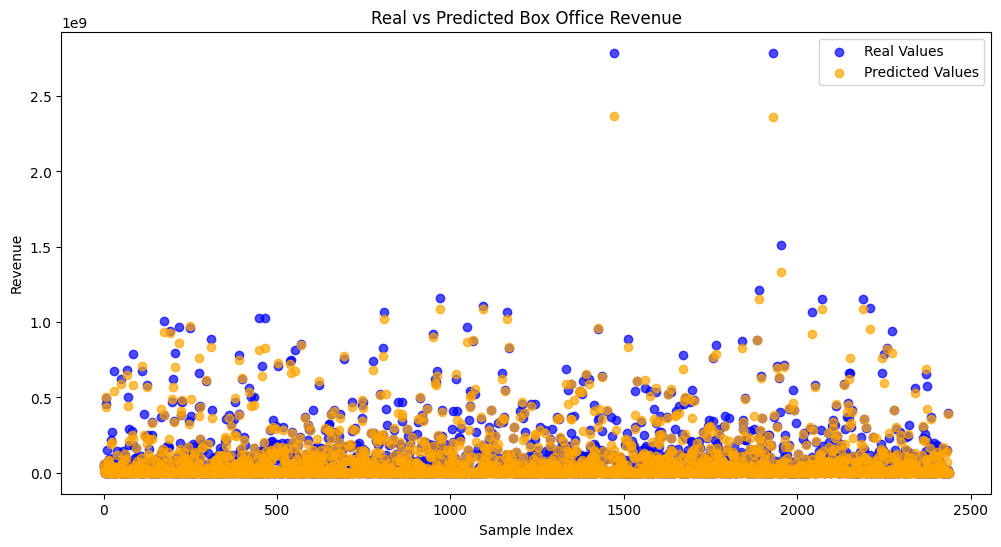

In [34]:
y_test_original = np.expm1(y_test)  # Reverse log1p transformation for true values
predictions_original = np.expm1(best_rf_predictions)  # Reverse log1p transformation for predictions

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_original)), y_test_original, label='Real Values', alpha=0.7, color='blue')
plt.scatter(range(len(predictions_original)), predictions_original, label='Predicted Values', alpha=0.7, color='orange')
plt.title('Real vs Predicted Box Office Revenue')
plt.xlabel('Sample Index')
plt.ylabel('Revenue')
plt.legend()
plt.show()
